In [1]:
import json

import matplotlib.pyplot as plt
import numpy as np
from paprika.io import PaprikaDecoder

Warning on use of the timeseries module: If the inherent timescales of the system are long compared to those being analyzed, this statistical inefficiency may be an underestimate.  The estimate presumes the use of many statistically independent samples.  Tests should be performed to assess whether this condition is satisfied.   Be cautious in the interpretation of the data.
/home/jsetiadi/mambaforge/envs/paprika-dev/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
with open("../attach/results_attach.json", "r") as f:
    attach = json.load(f, cls=PaprikaDecoder)

In [3]:
with open("../electrostatics-bulk/ti_results.json", "r") as f:
    elec_bulk = json.load(f, cls=PaprikaDecoder)

In [4]:
with open("../electrostatics-site/ti_results.json", "r") as f:
    elec_site = json.load(f, cls=PaprikaDecoder)

In [5]:
with open("../lennard-jones/ti_results.json", "r") as f:
    vdw = json.load(f, cls=PaprikaDecoder)

## Final binding free energy

In [6]:
dG_attach = -1 * attach["attach"]["ti-block"]["fe"].magnitude
sem_attach = attach["attach"]["ti-block"]["sem"].magnitude
dG_release = -1 * attach["ref_state_work"].magnitude

dG_elec_bulk = elec_bulk["fe"]
sem_elec_bulk = elec_bulk["sem"]

dG_elec_site = elec_site["fe"]
sem_elec_site = elec_site["sem"]

dG_vdw = vdw["fe"]
sem_vdw = vdw["sem"]

$$\Delta G_{\text{b}}^{\text{0}} = \Delta\Delta G_{\text{restraints}}^{\text{0}} + \Delta\Delta G_{\text{elec}} + \Delta\Delta G_{\text{vdW}}$$

$$\Delta\Delta G_{\text{elec}} = \Delta G_{\text{elec}}^{\text{bulk}} - \Delta G_{\text{elec}}^{\text{bulk}}$$

$$\Delta\Delta G_{\text{restraints}}^{\text{0}} = \Delta G_{\text{release}}^{\text{0}} - \Delta G_{\text{attach}} $$

$${\rm SEM}(\Delta G_{\rm b}^{\rm 0}) = \sqrt{ \delta G_{\rm attach}^2 + \delta {G_{\rm elec}^{\rm bulk}}^2  + \delta {G_{\rm elec}^{\rm site}}^2 + \delta G_{\rm vdW}^2}$$

In [7]:
fe = dG_attach + dG_elec_bulk + dG_elec_site + dG_vdw + dG_release
sem = (sem_attach**2 + sem_elec_bulk**2 + sem_elec_site**2 + sem_vdw**2) ** 0.5

In [8]:
print(f"Delta G(attach)    = {dG_attach:7.2f} +- {sem_attach:.2f} kcal/mol")
print(f"Delta G(elec-bulk) = {dG_elec_bulk:7.2f} +- {sem_elec_bulk:.2f} kcal/mol")
print(f"Delta G(elec-site) = {dG_elec_site:7.2f} +- {sem_elec_site:.2f} kcal/mol")
print(f"Delta G(vdW)       = {dG_vdw:7.2f} +- {sem_vdw:.2f} kcal/mol")
print(f"Delta G(release)   = {dG_release:7.2f}         kcal/mol")
print("---------------------------------------------")
print(f"Delta G(b)         = {fe:7.2f} +- {sem:.2f} kcal/mol")

Delta G(attach)    =   -3.24 +- 0.07 kcal/mol
Delta G(elec-bulk) =  125.74 +- 0.06 kcal/mol
Delta G(elec-site) = -116.40 +- 0.24 kcal/mol
Delta G(vdW)       =  -36.12 +- 0.39 kcal/mol
Delta G(release)   =   11.34         kcal/mol
---------------------------------------------
Delta G(b)         =  -18.68 +- 0.47 kcal/mol


## Free energy vs Lambda

/home/jsetiadi/mambaforge/envs/paprika-dev/lib/python3.10/site-packages/matplotlib/axes/_axes.py:3444: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  y = np.asarray(y, dtype=object)
/home/jsetiadi/mambaforge/envs/paprika-dev/lib/python3.10/site-packages/matplotlib/axes/_axes.py:3483: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(err, dtype=object)


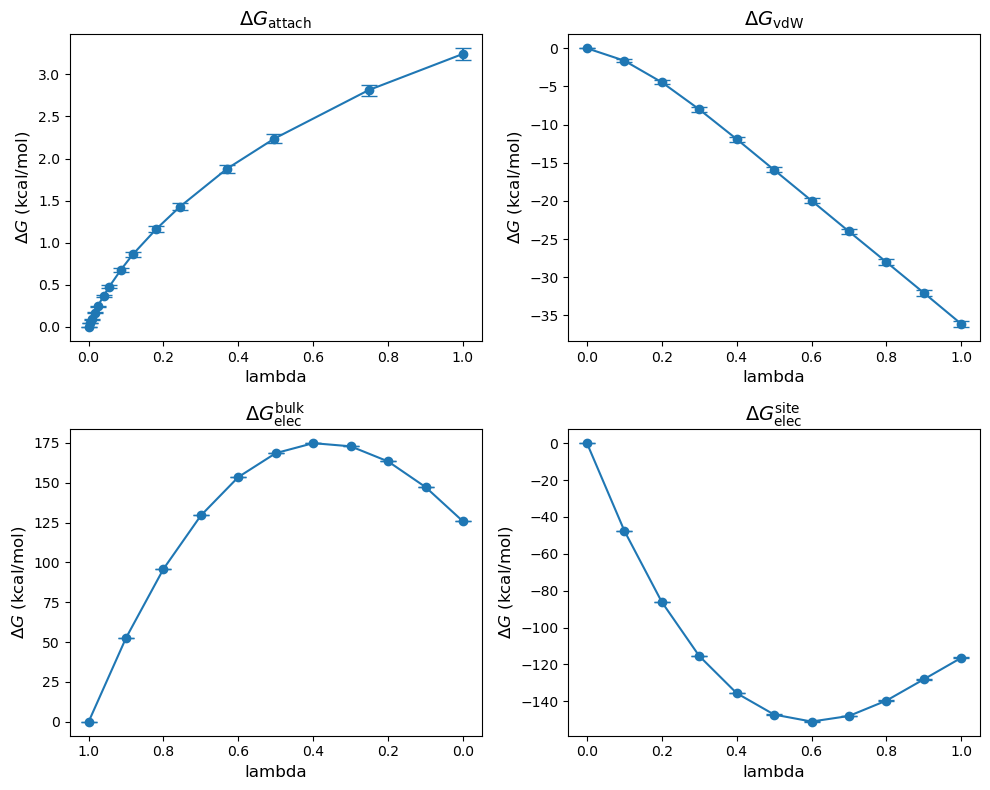

In [9]:
attach_string = (
    "0.00 0.40 0.80 1.60 2.40 4.00 5.50 8.65 11.80 18.10 24.40 37.00 49.60 74.80 100.00"
)
attach_fractions = [float(i) / 100 for i in attach_string.split()]

plt.figure(dpi=100, figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.errorbar(
    attach_fractions,
    attach["attach"]["ti-block"]["fe_matrix"][0, :],
    yerr=attach["attach"]["ti-block"]["sem_matrix"][0, :],
    fmt="-o",
    capsize=6,
)
plt.xlabel("lambda", fontsize=12)
plt.ylabel(r"$\Delta G$ (kcal/mol)", fontsize=12)
plt.title(r"$\Delta G_{\rm attach}$", fontsize=14)
plt.tight_layout()

plt.subplot(2, 2, 2)
plt.errorbar(
    np.linspace(0, 1, 11),
    vdw["fe_matrix"][0, :],
    yerr=vdw["sem_matrix"][0, :],
    fmt="-o",
    capsize=6,
)
plt.xlabel("lambda", fontsize=12)
plt.ylabel(r"$\Delta G$ (kcal/mol)", fontsize=12)
plt.title(r"$\Delta G_{\rm vdW}$", fontsize=14)
plt.tight_layout()

ax = plt.subplot(2, 2, 3)
plt.errorbar(
    np.linspace(0, 1, 11)[::-1],
    -1 * elec_bulk["fe_matrix"][0, :],
    yerr=elec_bulk["sem_matrix"][0, :],
    fmt="-o",
    capsize=6,
)
plt.xlabel("lambda", fontsize=12)
plt.ylabel(r"$\Delta G$ (kcal/mol)", fontsize=12)
plt.title(r"$\Delta G_{\rm elec}^{\rm bulk}$", fontsize=14)
plt.tight_layout()
ax.invert_xaxis()

plt.subplot(2, 2, 4)
plt.errorbar(
    np.linspace(0, 1, 11),
    elec_site["fe_matrix"][0, :],
    yerr=elec_site["sem_matrix"][0, :],
    fmt="-o",
    capsize=6,
)
plt.xlabel("lambda", fontsize=12)
plt.ylabel(r"$\Delta G$ (kcal/mol)", fontsize=12)
plt.title(r"$\Delta G_{\rm elec}^{\rm site}$", fontsize=14)
plt.tight_layout()

## Free energy convergence

In [10]:
def get_fe_convergence(results, method="ti-block"):
    convergence = {}

    # Free energy
    attach = results["attach"][method]["fraction_fe"]
    convergence["fe_a"] = -1 * np.array([attach[i].magnitude for i in attach])
    convergence["fractions"] = np.array([i for i in attach])

    # Error
    attach = results["attach"][method]["fraction_sem"]
    convergence["sem_a"] = np.array([attach[i].magnitude for i in attach])

    return convergence


convergence = get_fe_convergence(attach, method="ti-block")

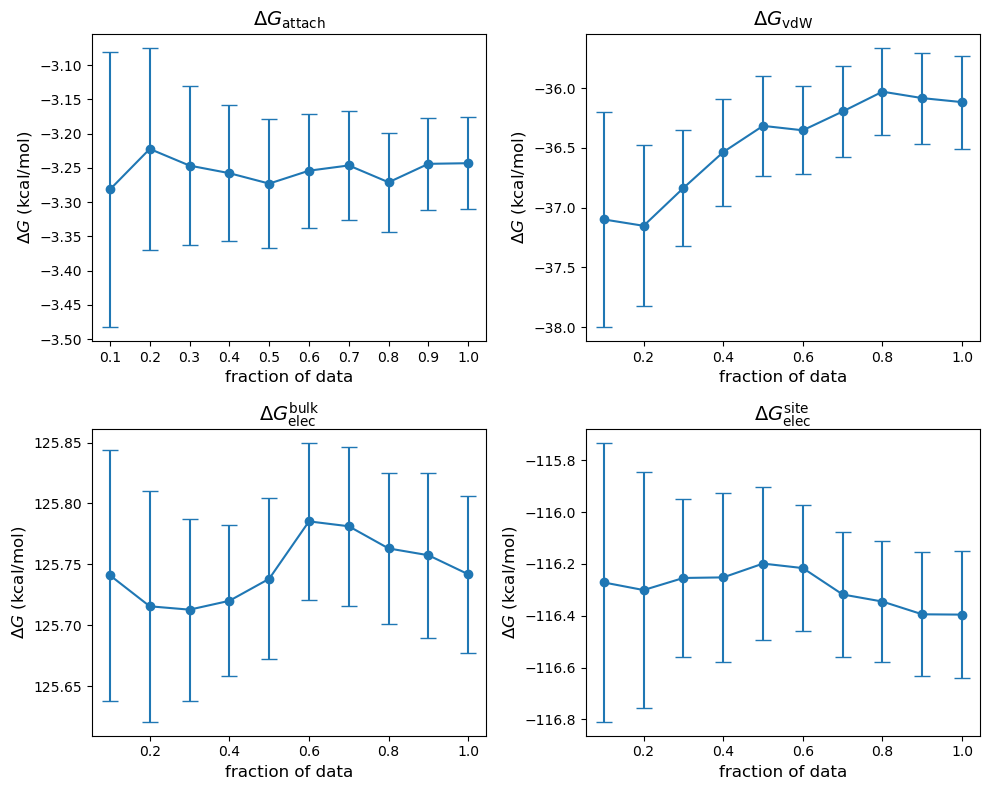

In [11]:
fe_fractions = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

plt.figure(dpi=100, figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.errorbar(
    convergence["fractions"],
    convergence["fe_a"],
    yerr=convergence["sem_a"],
    fmt="-o",
    capsize=6,
)
plt.xlabel("fraction of data", fontsize=12)
plt.ylabel(r"$\Delta G$ (kcal/mol)", fontsize=12)
plt.title(r"$\Delta G_{\rm attach}$", fontsize=14)
plt.tight_layout()

plt.subplot(2, 2, 2)
plt.errorbar(
    fe_fractions,
    [vdw["fraction_fe"][i] for i in vdw["fraction_fe"]],
    yerr=[vdw["fraction_sem"][i] for i in vdw["fraction_sem"]],
    fmt="-o",
    capsize=6,
)
plt.xlabel("fraction of data", fontsize=12)
plt.ylabel(r"$\Delta G$ (kcal/mol)", fontsize=12)
plt.title(r"$\Delta G_{\rm vdW}$", fontsize=14)
plt.tight_layout()

ax = plt.subplot(2, 2, 3)
plt.errorbar(
    fe_fractions,
    [-1 * elec_bulk["fraction_fe"][i] for i in elec_bulk["fraction_fe"]],
    yerr=[elec_bulk["fraction_sem"][i] for i in elec_bulk["fraction_sem"]],
    fmt="-o",
    capsize=6,
)
plt.xlabel("fraction of data", fontsize=12)
plt.ylabel(r"$\Delta G$ (kcal/mol)", fontsize=12)
plt.title(r"$\Delta G_{\rm elec}^{\rm bulk}$", fontsize=14)
plt.tight_layout()

plt.subplot(2, 2, 4)
plt.errorbar(
    fe_fractions,
    [elec_site["fraction_fe"][i] for i in elec_site["fraction_fe"]],
    yerr=[elec_site["fraction_sem"][i] for i in elec_site["fraction_sem"]],
    fmt="-o",
    capsize=6,
)
plt.xlabel("fraction of data", fontsize=12)
plt.ylabel(r"$\Delta G$ (kcal/mol)", fontsize=12)
plt.title(r"$\Delta G_{\rm elec}^{\rm site}$", fontsize=14)
plt.tight_layout()